In [1]:
import numpy as np
import math
from tslearn.piecewise import PiecewiseAggregateApproximation


filename = 'synthetic_size50k_len256_znorm.bin'
original50k_synthetic = np.fromfile(filename, dtype=np.float32).reshape(-1,256)

filename = 'seismic_size50k_len256_znorm.bin'
original50k_seismic = np.fromfile(filename, dtype=np.float32).reshape(-1,256)

In [2]:
x = original50k_synthetic
# paa transform
paa_128 = PiecewiseAggregateApproximation(n_segments=32)
sum128_x = paa_128.fit_transform(x)
rec128_x = paa_128.inverse_transform(sum128_x)

paa_64 = PiecewiseAggregateApproximation(n_segments=16)
sum64_x = paa_64.fit_transform(x)
rec64_x = paa_64.inverse_transform(sum64_x)

paa_32 = PiecewiseAggregateApproximation(n_segments=8)
sum32_x = paa_32.fit_transform(x)
rec32_x = paa_32.inverse_transform(sum32_x)

print(x.shape, sum128_x.shape, sum64_x.shape, sum32_x.shape)
print(x.shape, rec128_x.shape, rec64_x.shape, rec32_x.shape)

(50000, 256) (50000, 32, 1) (50000, 16, 1) (50000, 8, 1)
(50000, 256) (50000, 256, 1) (50000, 256, 1) (50000, 256, 1)


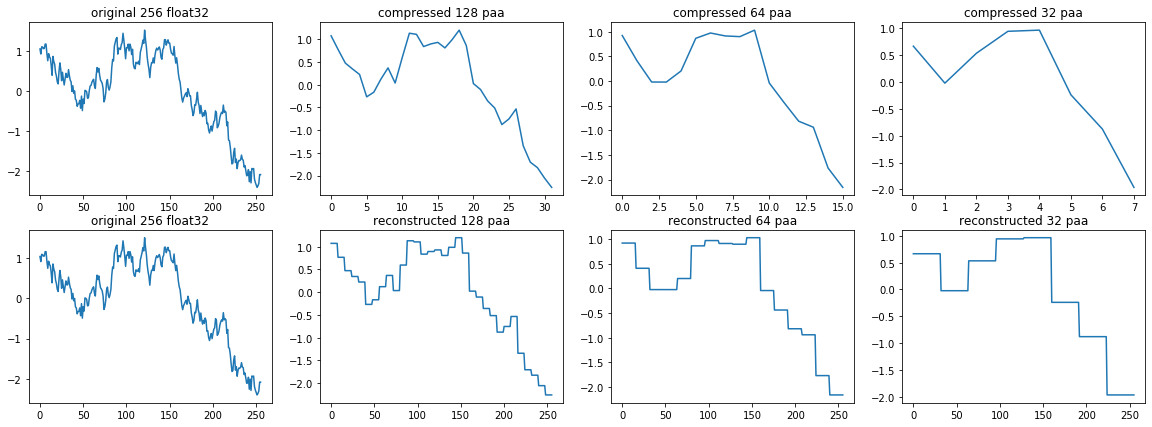

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 7]
i = 2
plt.subplot(2, 4, 1)
plt.title("original 256 float32")
plt.plot(x[i])
plt.subplot(2, 4, 2)
plt.title("compressed 128 paa")
plt.plot(sum128_x[i])
plt.subplot(2, 4, 3)
plt.title("compressed 64 paa")
plt.plot(sum64_x[i])
plt.subplot(2, 4, 4)
plt.title("compressed 32 paa")
plt.plot(sum32_x[i])
plt.subplot(2, 4, 5)
plt.title("original 256 float32")
plt.plot(x[i])
plt.subplot(2, 4, 6)
plt.title("reconstructed 128 paa")
plt.plot(rec128_x[i])
plt.subplot(2, 4, 7)
plt.title("reconstructed 64 paa")
plt.plot(rec64_x[i])
plt.subplot(2, 4, 8)
plt.title("reconstructed 32 paa")
plt.plot(rec32_x[i])

In [4]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(x,y):
    return sqrt(mean_squared_error(x, y))
def summarize_data(x):
    print("Average:", np.mean(x), " Mean:", np.median(x), " Max:", np.max(x), " Min:", np.min(x), "\n")

In [5]:
errorList_128_synthetic = []
errorList_64_synthetic = []
errorList_32_synthetic = []
for i in range(50000):
    errorList_128_synthetic.append(rmse(x[i], rec128_x[i]))
    errorList_64_synthetic.append(rmse(x[i], rec64_x[i]))   
    errorList_32_synthetic.append(rmse(x[i], rec32_x[i]))

In [6]:
# Reconstruction error for 50k synthetic time_series
print("Reconstruction Error of 50k synthetic time series: 128 -> 256")
summarize_data(errorList_128_synthetic)
print("Reconstruction Error of 50k synthetic time series: 64 -> 256")
summarize_data(errorList_64_synthetic)
print("Reconstruction Error of 50k synthetic time series: 32 -> 256")
summarize_data(errorList_32_synthetic)

Reconstruction Error of 50k synthetic time series: 128 -> 256
Average: 0.21694455583525946  Mean: 0.20642226941725988  Max: 0.6278186737715106  Min: 0.05853049187862091 

Reconstruction Error of 50k synthetic time series: 64 -> 256
Average: 0.3054193229624998  Mean: 0.2919313612152152  Max: 0.8311823087173826  Min: 0.08091474299383135 

Reconstruction Error of 50k synthetic time series: 32 -> 256
Average: 0.42459180888737597  Mean: 0.40900769784039737  Max: 0.9728942107472535  Min: 0.13199696354163096 



In [7]:
x = original50k_seismic
# paa transform
paa_128 = PiecewiseAggregateApproximation(n_segments=32)
sum128_x = paa_128.fit_transform(x)
rec128_x = paa_128.inverse_transform(sum128_x)

paa_64 = PiecewiseAggregateApproximation(n_segments=16)
sum64_x = paa_64.fit_transform(x)
rec64_x = paa_64.inverse_transform(sum64_x)

paa_32 = PiecewiseAggregateApproximation(n_segments=8)
sum32_x = paa_32.fit_transform(x)
rec32_x = paa_32.inverse_transform(sum32_x)

print(x.shape, sum128_x.shape, sum64_x.shape, sum32_x.shape)
print(x.shape, rec128_x.shape, rec64_x.shape, rec32_x.shape)

(50000, 256) (50000, 32, 1) (50000, 16, 1) (50000, 8, 1)
(50000, 256) (50000, 256, 1) (50000, 256, 1) (50000, 256, 1)


In [8]:
errorList_128_seismic = []
errorList_64_seismic = []
errorList_32_seismic = []
for i in range(50000):
    errorList_128_seismic.append(rmse(x[i], rec128_x[i]))
    errorList_64_seismic.append(rmse(x[i], rec64_x[i]))   
    errorList_32_seismic.append(rmse(x[i], rec32_x[i]))
# Reconstruction error for 50k seismic time_series
print("Reconstruction Error of 50k seismic time series: 128 -> 256")
summarize_data(errorList_128_seismic)
print("Reconstruction Error of 50k seismic time series: 64 -> 256")
summarize_data(errorList_64_seismic)
print("Reconstruction Error of 50k seismic time series: 32 -> 256")
summarize_data(errorList_32_seismic)

Reconstruction Error of 50k seismic time series: 128 -> 256
Average: 0.9880892463377949  Mean: 0.990371858187647  Max: 0.9988959299218368  Min: 0.6447111250271275 

Reconstruction Error of 50k seismic time series: 64 -> 256
Average: 0.9966828259306445  Mean: 0.9972059637148376  Max: 0.9997719861210851  Min: 0.9080755505458742 

Reconstruction Error of 50k seismic time series: 32 -> 256
Average: 0.9986656248605913  Mean: 0.9990045471003876  Max: 0.9999894132541614  Min: 0.9638602729769217 

